# Chapter: Finding Groups in Process Data: Clustering & Mixture Modeling

# Topic: K-Means clustering failure

In [1]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          An illustration where K-Means clustering fails
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [20]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

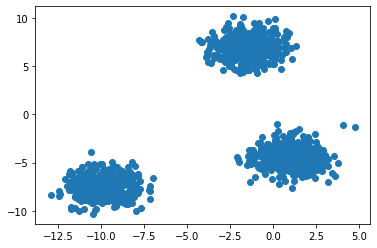

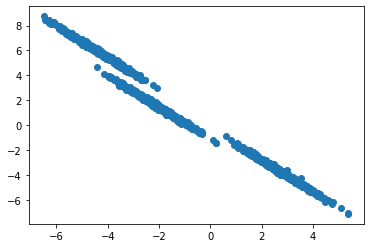

In [23]:
# generate ellipsoidal shaped data
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=100)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

rotation_matrix = [[0.60, -0.70], [-0.5, 0.7]]
X_transformed = np.dot(X, rotation_matrix)

plt.figure()
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.show()

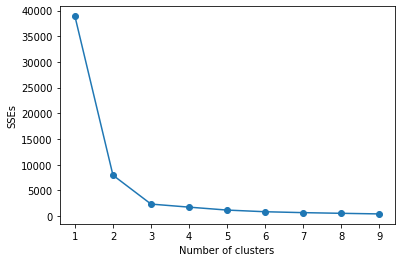

In [24]:
# determining number of clusters via elbow method
SSEs = []
for n_cluster in range(1, 10):
    kmeans = KMeans(n_clusters = n_cluster, random_state = 100).fit(X_transformed)
    SSEs.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,10), SSEs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSEs')
plt.show()

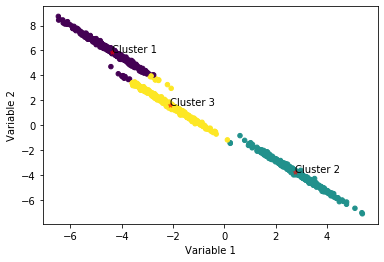

In [26]:
# fit k-means model
n_cluster = 3
kmeans = KMeans(n_clusters = n_cluster, random_state = 100).fit(X_transformed)
cluster_label = kmeans.predict(X_transformed) # can also use kmeans.labels_

plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = cluster_label, s=20, cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

cluster_centers = kmeans.cluster_centers_
cluster_plot_labels = ['Cluster ' + str(i+1) for i in range(n_cluster)]
for i in range(n_cluster):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c='red', s=20, marker = '*', alpha=0.5)
    plt.annotate(cluster_plot_labels[i], (cluster_centers[i,0], cluster_centers[i,1]))

plt.show()